<a href="https://colab.research.google.com/github/chandrakiranck/fuzzy-adventure/blob/master/diabetesreadmisssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports
 
We will use the standard data science and machine learning libraries: `numpy`, `pandas`, and `scikit-learn`. We also use `matplotlib` and `seaborn` for visualization. 

In [0]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# For ignoring and non-display of warnings
import warnings 
warnings.filterwarnings('ignore')

# For estimations of different statistical models
import statsmodels.api as sm

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.25)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# For changing categorical to numerical
from sklearn.preprocessing import LabelEncoder

# For performing statistical operations
import scipy.stats as stats

# For check for multi col-linearity among features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For standardizing features
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

# For checking accuracy score of the models
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,classification_report,accuracy_score,auc

#For outlier treatment
from scipy.stats.mstats import winsorize

# For tuning model hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Data Cleaning and Formatting

## Load in the Data and Examine

We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. Think of it as a spreadsheet within Python that we can easily manipulate, clean, and visualize. [Pandas has many methods](http://pandas.pydata.org/pandas-docs/stable/) to help make the data science/machine learning pipeline as smooth as possible.

In [0]:
# Read in data into a dataframe 
data=pd.read_csv("diabetic_data.csv")
# Display top of dataframe
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Taking a look at the raw data, we can already see a number of issues we'll have to solve. First of all, there are 50 columns and we don't know what many of them mean! All we know from the problem statement is that we want to predict the class in the readmitted column. Some of the other column definitions can be reasonably guessed, but others are difficult to understand. In machine learning, this isn't actually a problem, because we let the model decide which features are important. Sometimes we may not even be given column names or told what we are predicting. Nonetheless, I like to understand the problem to the extent possible, and because we also want to interpret the model results, it would be a good idea to have some knowledge of the columns.

While we don't need to study every column, it would be a good idea to at least understand the target we want to predict. Here is the definition for the readmitted target:
In this database, we have **3 different outputs**:

  **No re-admission**;

  **A re-admission in less than 30 days** ;

  **A re-admission in more than 30 days**;

In [0]:
data["readmitted"].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

## Data Types and Missing Values

The dataframe.info method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. Already from looking at the dataframe, there might be a problem because the missing values are coded as "?" rather than as np.nan (not a number). This means that the columns with numbers will not be represented as numeric because pandas converts columns with any strings values into columns of all strings.

In [0]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

Sure enough, there are a number of columns with numbers that have been recorded as object datatypes. These will have to be converted to numeric datatype before we can do any numerical analysis.

## Missing Values

In [0]:
# Replace all occurrences of ? with numpy not a number
data.replace('?',np.nan,inplace=True)

We can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.     
     
Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column. As with many tasks in data science, we did not write this function ourselves, but rather found it online in a Stack Overflow forum!     

In [0]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [0]:
missing_values_table(data)

Your selected dataframe has 50 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
weight,98569,96.9
medical_specialty,49949,49.1
payer_code,40256,39.6
race,2273,2.2
diag_3,1423,1.4
diag_2,358,0.4
diag_1,21,0.0


Although we want to be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use.

What columns to retain may be a little arbitrary, but for this project, we will remove any columns with more than 30% missing values.

In [0]:
# Get the columns with > 30% missing
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 30].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 50 columns.
There are 7 columns that have missing values.
We will remove 3 columns.


In [0]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

We are dropping all rows containing null values as the number of nulls present are approximately 4% of the entire dataset.

In [0]:
# dropping rows with NaNs.
data.dropna(inplace=True)

# Rearrange the index
data.index = range(len(data))

## Convert Data to Correct Type

We will convert the columns with numbers into numeric data types by replacing the strings which can be interpreted as floats. Then we will convert the columns that contain numeric values into numeric datatypes.     

**Values of diagnosis:**     
     
International Classification of Diseases (ICD-9) - The International Classification of Diseases (ICD) is designed to promote international comparability in the collection, processing, classification, and presentation of mortality statistics.     
     
For codes and related diseases, please refer to the following link -    

https://www2.gov.bc.ca/gov/content/health/practitioner-professional-resources/msp/physicians/diagnostic-code-descriptions-icd-9

For diag_1, diag_2 and diag_3 columns, we will replace all values containing E or V with - for transformation to a numerical type. We will also change all 250.xx values to 250.

In [0]:
# Replacement and transformation for diagnosis variables.

diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    data[col] = data[col].str.replace('E','-')
    data[col] = data[col].str.replace('V','-')
    condition = data[col].str.contains('250')
    data.loc[condition,col] = '250'
    
data[diag_cols] = data[diag_cols].astype(float)

We will group the various codes of diagnosis according to ICD-9 standard.

In [0]:
# Function to group diag_1, diag_2 and diag_3

def grouping(value):
    if value==250:
        return 'Diabetes'
    elif (value>=390 and value<=459) or (value==785):
        return 'Circulatory'
    elif (value>=460 and value<=519) or (value==786):
        return 'Respiratory'
    elif (value>=520 and value<=579) or (value==787):
        return 'Digestive'
    elif (value>=800 and value<=999):
        return 'Injury'
    elif (value>=710 and value<=739):
        return 'Musculoskeletal'
    elif (value>=580 and value<=629) or value==788:
        return 'Genitourinary'
    elif (value>=1 and value<=239) or (value in [780,781,782,784]) or (value>=790 and value<=799) or ((value>=240 and value<=279) and 
                                                                                           value!=250) or (value>=680 and 
                                                                                                          value<=709):
        return 'Neoplasms'
    else:
        return "Other"

In [0]:
# Grouping
for col in diag_cols:
    data[col] = data[col].apply(grouping)

**Values of max_glu_serum:**    
     
Blood sugar level - The blood sugar level, blood sugar concentration, or blood glucose level is the concentration of glucose present in the blood of humans and other animals. Glucose is a simple sugar and approximately 4 grams of glucose are present in the blood of a 70-kilogram (150 lb) human at all times.[2] The body tightly regulates blood glucose levels as a part of metabolic homeostasis.[2] Glucose is stored in skeletal muscle and liver cells in the form of glycogen;[2] in fasted individuals, blood glucose is maintained at a constant level at the expense of glycogen stores in the liver and skeletal muscle.

For various levels, please refer to the below link -

https://www.sciencedirect.com/topics/immunology-and-microbiology/glucose-level

In [0]:
data['max_glu_serum'] = data['max_glu_serum'].replace({'>200':"high",'>300':"veryhigh"})
data["max_glu_serum"].value_counts()

None        92845
Norm         2532
high         1449
veryhigh     1227
Name: max_glu_serum, dtype: int64

**Values of A1Cresult:**
     
If you have diabetes, you should have an A1C test at least twice each year to find out your long-term blood glucose control. The A1C test measures your average blood glucose during the previous 2-3 months, but especially during the previous month.     

For various levels, please refer to the below link -     

https://clinical.diabetesjournals.org/content/24/1/9

In [0]:
# Transformation for A1Cresult column

data['A1Cresult'] = data['A1Cresult'].replace({'>7':'high','>8':'veryhigh'})
data['A1Cresult'].value_counts()

None        81860
veryhigh     7631
Norm         4854
high         3708
Name: A1Cresult, dtype: int64

**Values of Medications**: 

For the generic names: ***metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone***, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

We will map 'Up' with 3, 'Down' with 1, 'Steady' with 2 and 'No' with 0

In [0]:
# Transforamtion for medications

data.iloc[:,21:44] = data.iloc[:,21:44].replace({'Up':3, 'Down':1, 'Steady':2, 'No':0}).astype(int)

#### Values for gender:

We will consider all genders which either belong to the categories of "Male" or "Female".

In [0]:
#Filtering out data which does not have gender specified as "Male" or "Female"
data=data[(data['gender'] == "Male")| (data['gender'] =="Female")]

**Values for readmitted:**     

We will proceed based on the theory that either the person did not appear for readmission mapped as 0 or appeared for readmission in less or greater than 30 days as the medical procedure was not optimal mapped as 1.

In [0]:
#Transformation of re-admitted (target Variable)
data['readmitted'] = data['readmitted'].replace({'NO':0,'>30':1,"<30":1}).astype('category')

### Outliers

Outliers can occur for many reasons: typos, malfunctions in measuring devices, incorrect units, or they can be legitimate but extreme values. Outliers can throw off a model because they are not indicative of the actual distribution of data.     

When we remove or cap outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be the result of actual phenomenon that we should further investigate. When capping outliers, we tried to be as conservative as possible, using the definition of an outlier based on winsorization:

https://en.wikipedia.org/wiki/Winsorizing

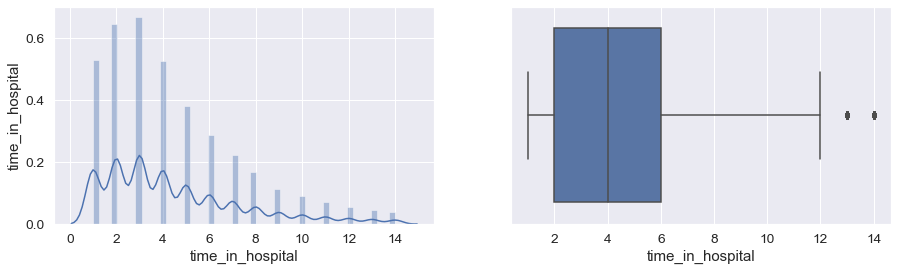

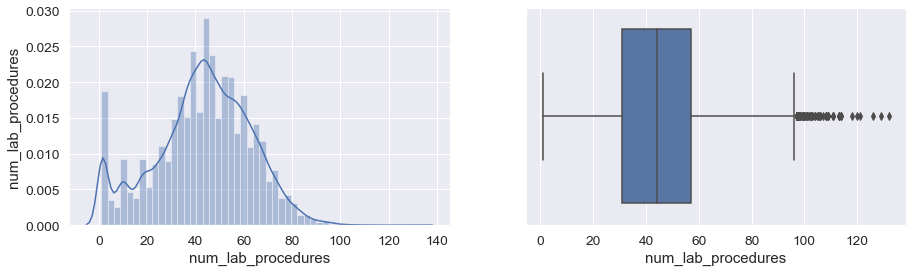

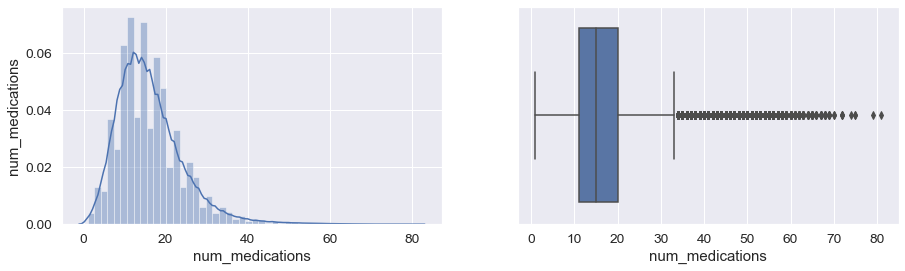

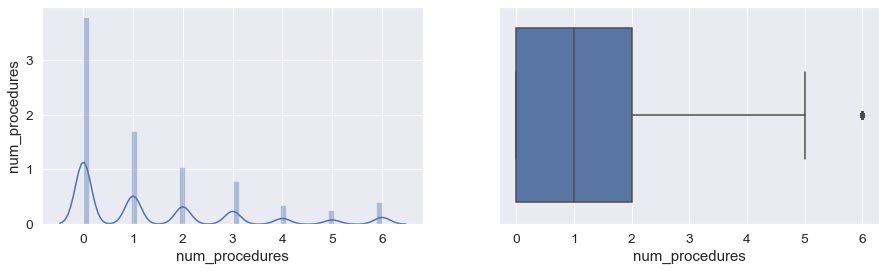

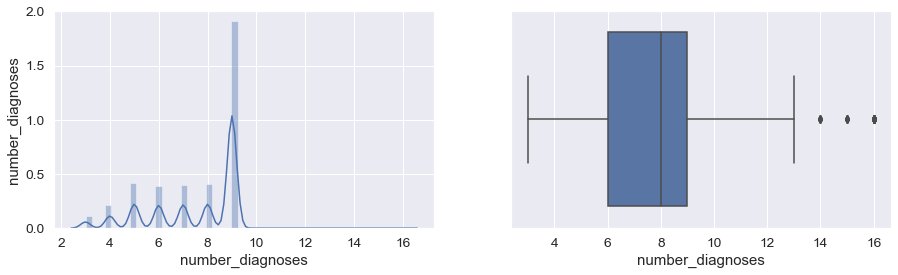

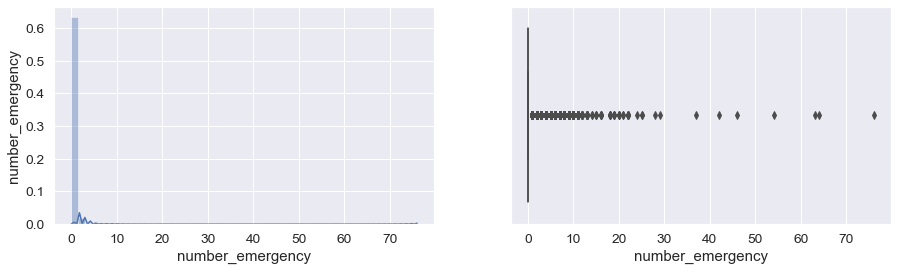

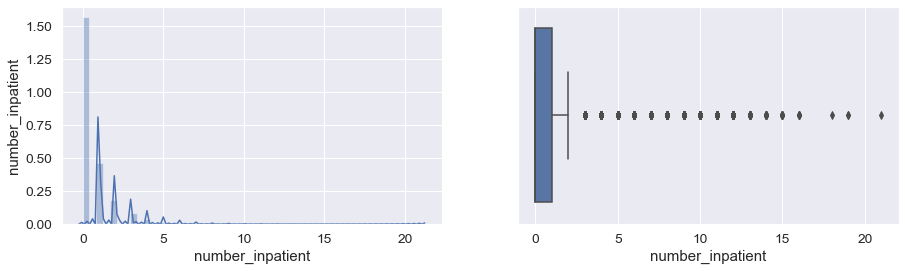

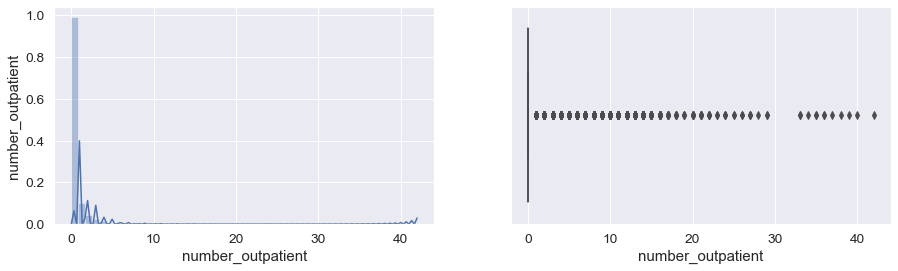

In [0]:
#For checking presence of outliers

num = ["time_in_hospital","num_lab_procedures","num_medications","num_procedures","number_diagnoses","number_emergency",
       "number_inpatient","number_outpatient"]
for var in num:
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    fig = sns.distplot((data[var]))
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.boxplot((data[var]))
    fig.set_xlabel(var)

    plt.show()

In [0]:
#Capping outliers

for var in num:
    data[var] = winsorize(data[var], limits=[0.05, 0.05])

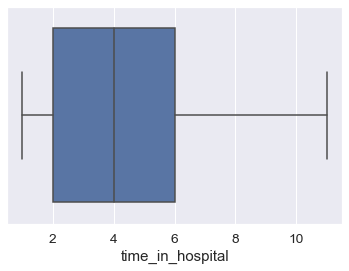

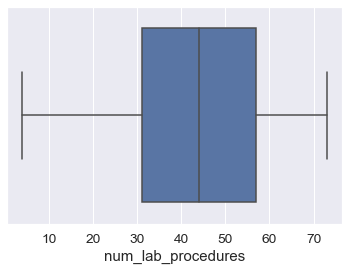

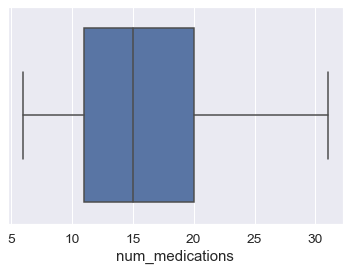

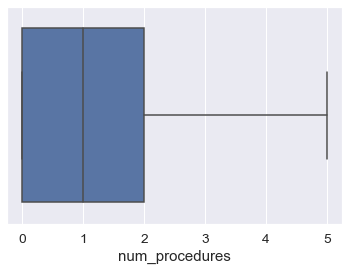

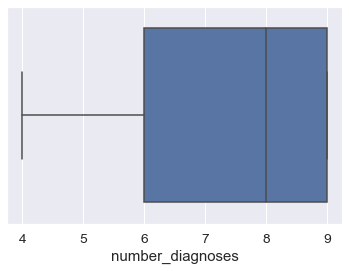

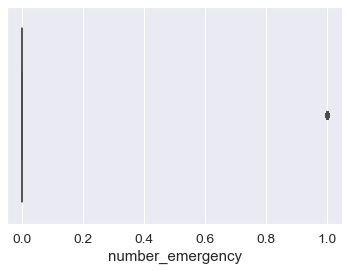

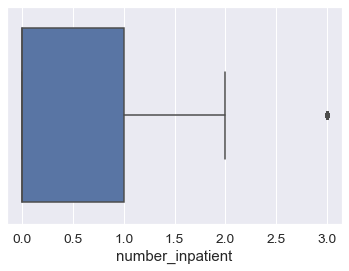

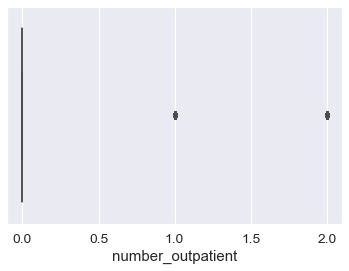

In [0]:
#Verifying capping of outliers

for var in num:
    sns.boxplot(data[var])
    plt.show()

### **Exploratory Data Analysis**
Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.


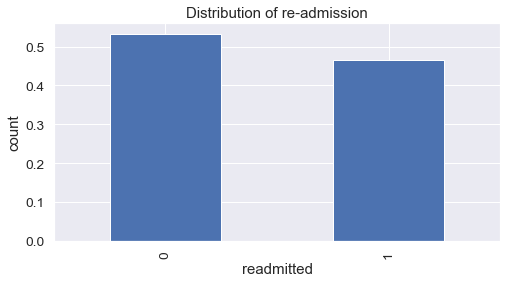

In [0]:
# Bar plot of readmitted

plt.figure(figsize=(8,4))
data['readmitted'].value_counts(normalize=True).plot(kind='bar').set_title("Distribution of re-admission")
plt.xlabel("readmitted")
plt.ylabel("count")
plt.show()

In [0]:
data['readmitted'].value_counts()

0    52337
1    45715
Name: readmitted, dtype: int64

**Inferences:**

1. The number of patients appearing for readmission in the hospitals is slightly less than the ones not appearing for the same.
2. The target variable is fairly balanced.

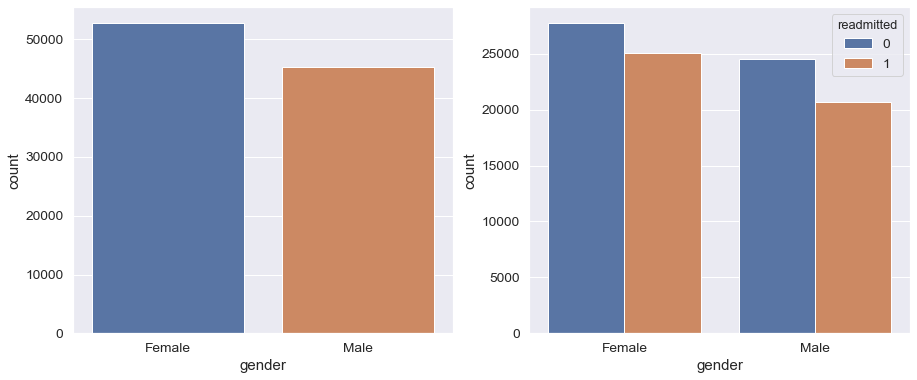

In [0]:
# Count plot of Gender by readmission status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(data['gender'], ax=axes[0])
sns.countplot(data['gender'],hue = data['readmitted'], ax=axes[1])
plt.show()

In [0]:
pd.crosstab(data['gender'],data['readmitted'])

readmitted,0,1
gender,,
Female,27771,25062
Male,24566,20653


**Inferences:**

1.   The number of females are more than the number of males.
2.   Percentage of males getting readmitted is approximately 45.67% of total males.
3.   Percentage of females getting readmitted is approximately 47.44 of total females.

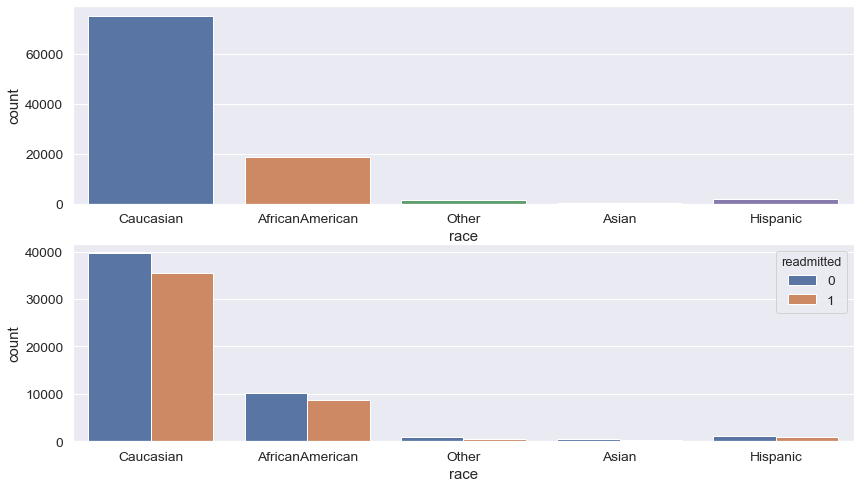

In [0]:
# Count plot of Race by readmission status

f, axes = plt.subplots(2, 1, figsize=(14,8))
axes = axes.flatten()
sns.countplot(data['race'], ax=axes[0])
sns.countplot(data['race'],hue = data['readmitted'], ax=axes[1])
plt.show()

In [0]:
pd.crosstab(data['race'],data['readmitted'])

readmitted,0,1
race,,
AfricanAmerican,10198,8683
Asian,401,224
Caucasian,39693,35386
Hispanic,1144,840
Other,901,582


**Inferences:**

1.   The total number of Caucasians are significantly more than any other race.
2.   The race of Asians are least in number.
3.   47.13% of the Caucasians gets readmitted (highest) whereas 35.84% of the Asians gets readmitted (lowest).

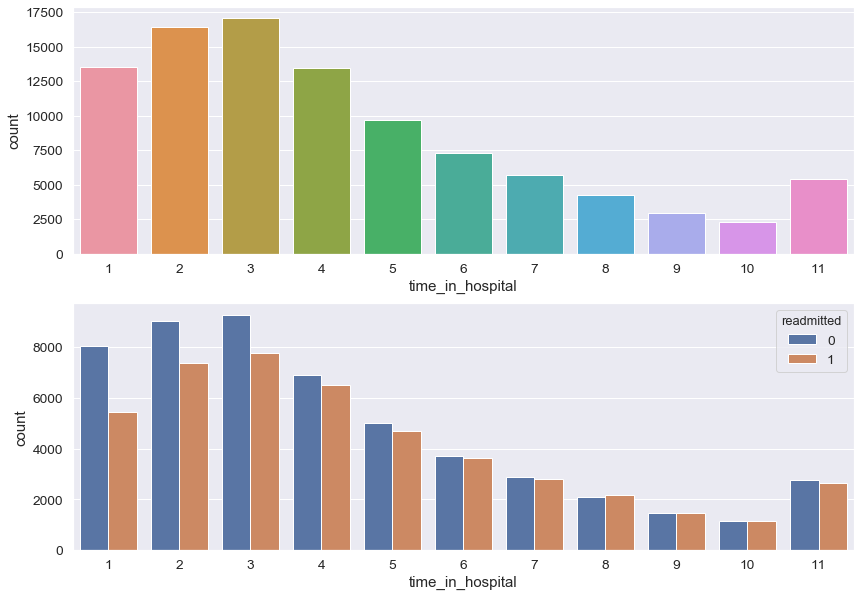

In [0]:
# Count plot of time spent in hospital by readmission status

f, axes = plt.subplots(2, 1, figsize=(14,10))
axes = axes.flatten()
sns.countplot(data['time_in_hospital'],ax=axes[0])
sns.countplot(data['time_in_hospital'],hue = data['readmitted'], ax=axes[1])
plt.show()

In [0]:
pd.crosstab(data['time_in_hospital'],data['readmitted'])

readmitted,0,1
time_in_hospital,,
1,8051,5438
2,9046,7395
3,9281,7768
4,6904,6530
5,5007,4692
6,3702,3618
7,2877,2817
8,2102,2174
9,1449,1479


**Inferences:**

1. The average number of days of admission is around 4 days.
2. Most patients spend time ranging from 1 to 4 days in the hospital.
3. Approximately 50-51% of the patients gets readmitted under the time of 8 to 10 days (highest) whereas 40.31% in case of patients coming for a single day (lowest).

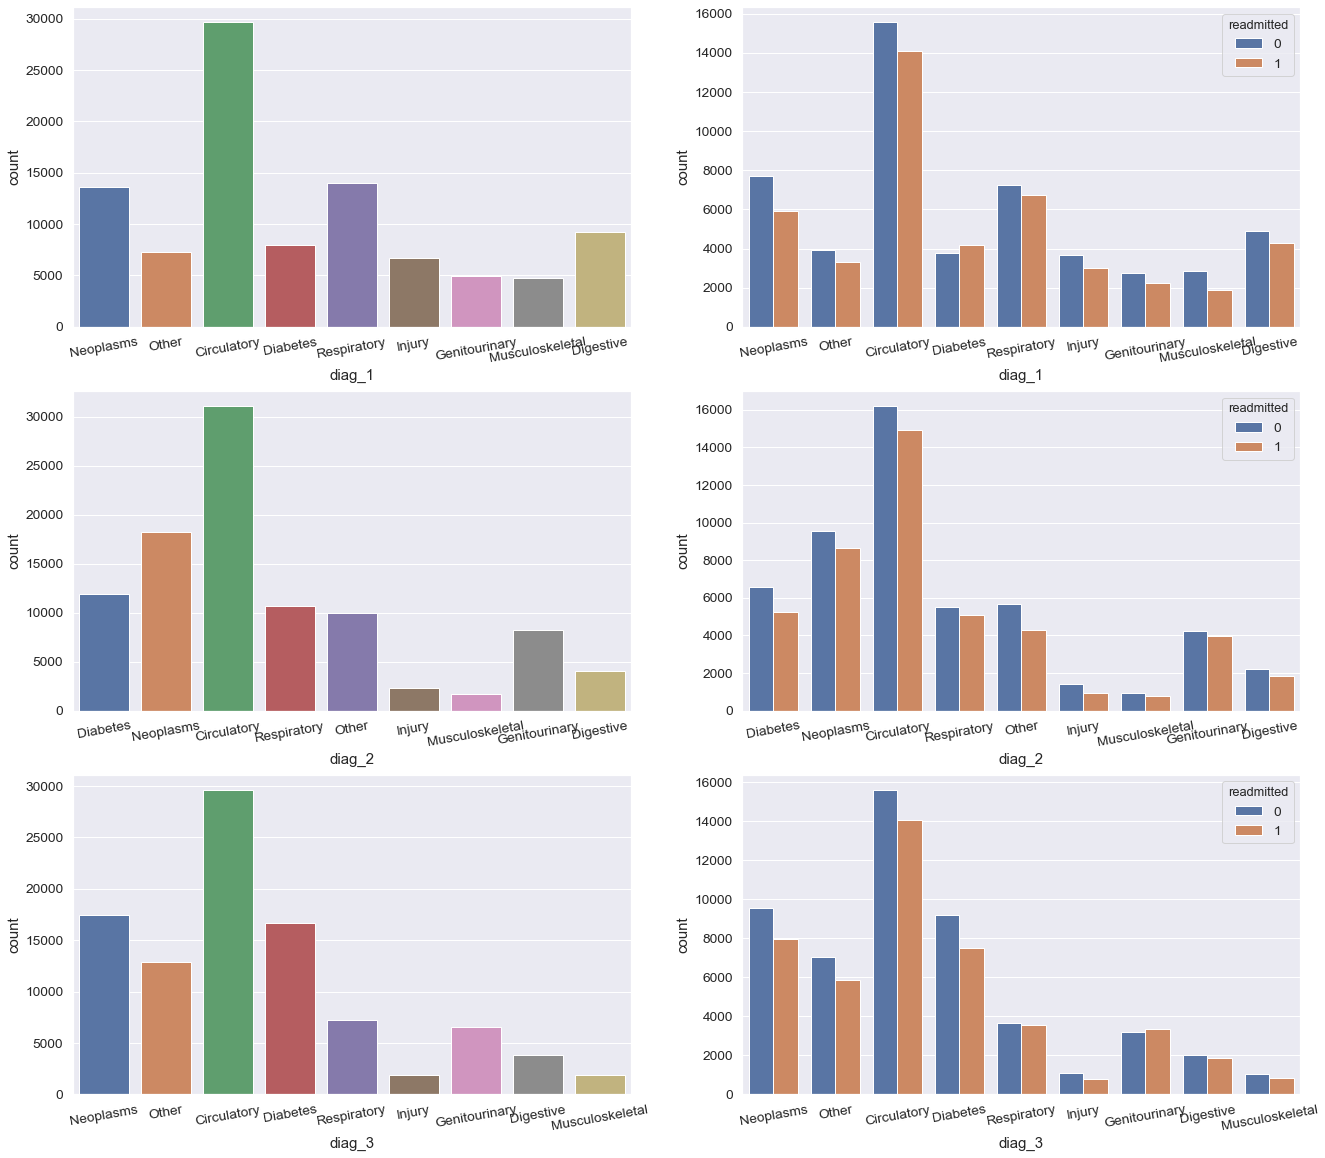

In [0]:
# Count plot of Primary, secondary and tertiary diagnosis by readmission status

fig,ax = plt.subplots(3,2,figsize=(22,20))
ax = ax.flatten()

a=sns.countplot(data['diag_1'], ax=ax[0])
a.tick_params(axis="x",labelrotation=10)
b=sns.countplot(data['diag_1'],hue=data['readmitted'], ax=ax[1])
b.tick_params(axis="x",labelrotation=10)

c=sns.countplot(data['diag_2'], ax=ax[2])
c.tick_params(axis="x",labelrotation=10)
d=sns.countplot(data['diag_2'],hue=data['readmitted'], ax=ax[3])
d.tick_params(axis="x",labelrotation=10)
e=sns.countplot(data['diag_3'], ax=ax[4])
e.tick_params(axis="x",labelrotation=10)
f=sns.countplot(data['diag_3'],hue=data['readmitted'], ax=ax[5])
f.set_xticklabels(f.get_xticklabels(), rotation=10)
plt.show()

In [0]:
pd.crosstab(data['diag_1'],data['readmitted'])

readmitted,0,1
diag_1,,
Circulatory,15557,14072
Diabetes,3764,4201
Digestive,4902,4285
Genitourinary,2734,2249
Injury,3681,3022
Musculoskeletal,2852,1887
Neoplasms,7689,5900
Other,3927,3337
Respiratory,7231,6762


In [0]:
pd.crosstab(data['diag_2'],data['readmitted'])

readmitted,0,1
diag_2,,
Circulatory,16199,14904
Diabetes,6593,5269
Digestive,2216,1833
Genitourinary,4249,3954
Injury,1397,931
Musculoskeletal,951,759
Neoplasms,9528,8669
Other,5676,4287
Respiratory,5528,5109


In [0]:
pd.crosstab(data['diag_3'],data['readmitted'])

readmitted,0,1
diag_3,,
Circulatory,15598,14033
Diabetes,9188,7507
Digestive,1989,1863
Genitourinary,3188,3339
Injury,1104,786
Musculoskeletal,1028,834
Neoplasms,9547,7939
Other,7042,5868
Respiratory,3653,3546


**Inferences:**

1. The total number of patients under the primary diagnosis category of 'Circulatory' is maximum.
2. Diabetes has the maximum number of readmissions under primary diagnosis (52.74%) whereas Musculoskeletal has the lowest with 39.82%.
3. Genitourinary and Respiratory has the maximum number of readmissions under secondary diagnosis (approx. 48%) whereas Injury has the lowest with 39.99%.
4. Genitourinary has the maximum number of readmissions under tertiary diagnosis (51.16%) whereas Injury has the lowest with 41.59%.

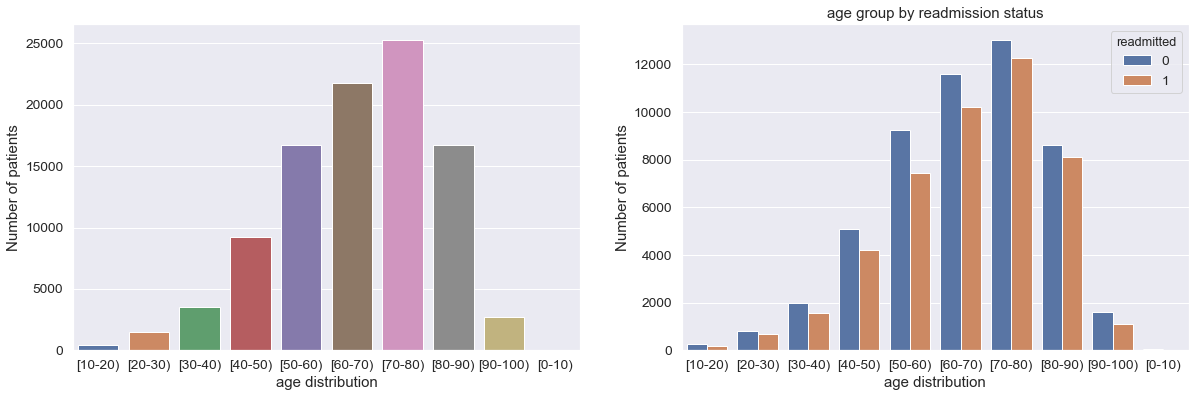

In [0]:
# Count plot of age groups by readmission status

f, axes = plt.subplots(1, 2, figsize=(20,6))
axes = axes.flatten()
sns.countplot(data['age'], ax=axes[0])
axes[0].set_xlabel('age distribution')
axes[0].set_ylabel('Number of patients')
sns.countplot(data['age'],hue = data['readmitted'], ax=axes[1]).set_title('age group by readmission status')
axes[1].set_xlabel('age distribution')
axes[1].set_ylabel('Number of patients')
plt.show()

In [0]:
pd.crosstab(data['age'],data['readmitted'])

readmitted,0,1
age,,
[0-10),51,14
[10-20),271,195
[20-30),805,673
[30-40),1998,1550
[40-50),5076,4189
[50-60),9255,7442
[60-70),11614,10195
[70-80),13038,12267
[80-90),8604,8098


**Inferences:**

1. Patients with age ranging from 70-80 years are most in number followed by 60-70.
2. Around 48.5% of patients under the age groups of 70-80 and 80-90 gets readmitted which is the most in number while the age group of 0-10 has the least with 21.54%.

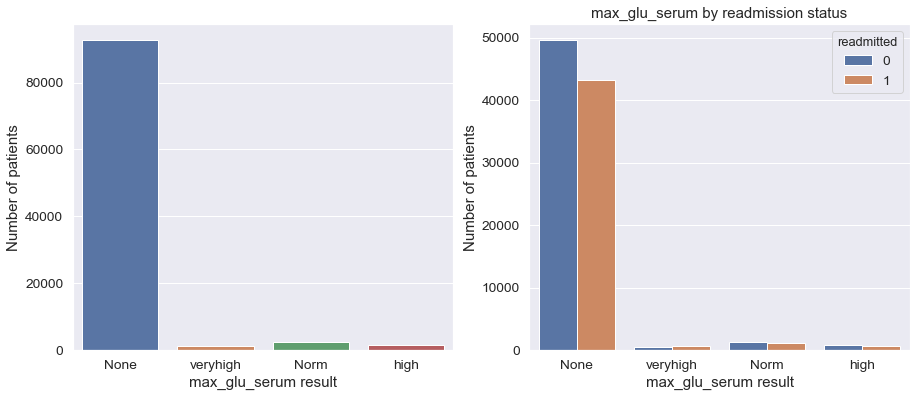

In [0]:
# Count plot for max_glu_serum by readmission status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(data['max_glu_serum'], ax=axes[0])
axes[0].set_xlabel('max_glu_serum result')
axes[0].set_ylabel('Number of patients')
sns.countplot(data['max_glu_serum'],hue = data['readmitted'], ax=axes[1]).set_title('max_glu_serum by readmission status')
axes[1].set_xlabel('max_glu_serum result')
axes[1].set_ylabel('Number of patients')
plt.show()

In [0]:
pd.crosstab(data['max_glu_serum'],data['readmitted'])

readmitted,0,1
max_glu_serum,,
None,49676,43168
Norm,1376,1156
high,746,703
veryhigh,539,688


**Inferences:**

* Approximately 95% of patients are not taking max_glu_serum test
* Approximately 56.07% of patients whose results are very high were readmitted (highest) whereas 45.66% of patients under the category of people whose results are normal were readmitted (lowest).

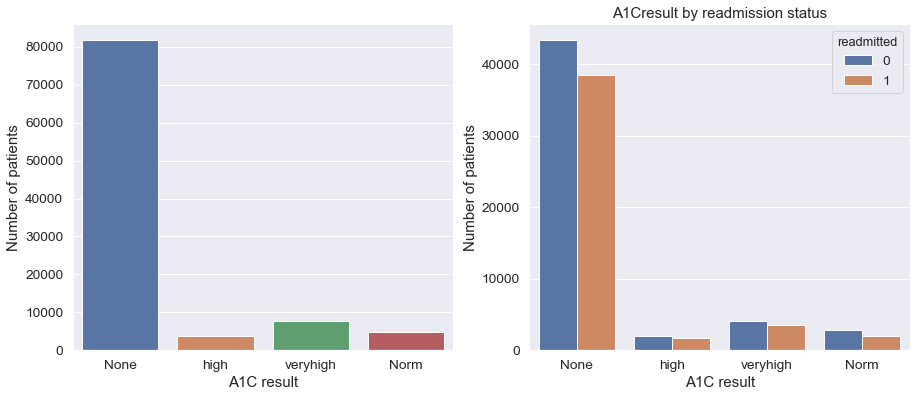

In [0]:
# Count plot for A1Cresult by readmission status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(data['A1Cresult'], ax=axes[0])
axes[0].set_xlabel('A1C result')
axes[0].set_ylabel('Number of patients')
sns.countplot(data['A1Cresult'],hue = data['readmitted'], ax=axes[1]).set_title('A1Cresult by readmission status')
axes[1].set_xlabel('A1C result')
axes[1].set_ylabel('Number of patients')
plt.show()

In [0]:
pd.crosstab(data['A1Cresult'],data['readmitted'])

readmitted,0,1
A1Cresult,,
None,43405,38454
Norm,2814,2040
high,2058,1650
veryhigh,4060,3571


**Inferences:**

* Number of patients those who did not take A1C test are higher.
* Approximately 47% of patients are getting readmitted who either did not take the test or had a very high test result (highest) while people whose results were normal are lowest in number (42.03%).

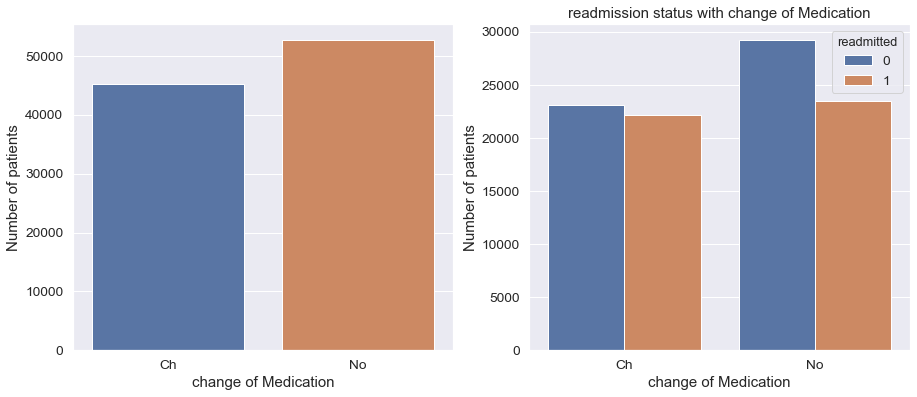

In [0]:
# Count plot for medication changes by readmission status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(data['change'], ax=axes[0])
axes[0].set_xlabel('change of Medication')
axes[0].set_ylabel('Number of patients')
sns.countplot(data['change'],hue = data['readmitted'], ax=axes[1]).set_title('readmission status with change of Medication')
axes[1].set_xlabel('change of Medication')
axes[1].set_ylabel('Number of patients')
plt.show()

In [0]:
pd.crosstab(data['change'],data['readmitted'])

readmitted,0,1
change,,
Ch,23068,22210
No,29269,23505


**Inferences:**

* More number of patients did not prefer a change of medication.
* Patients who had a change of medication had a higher rate of readmission (49.05%).

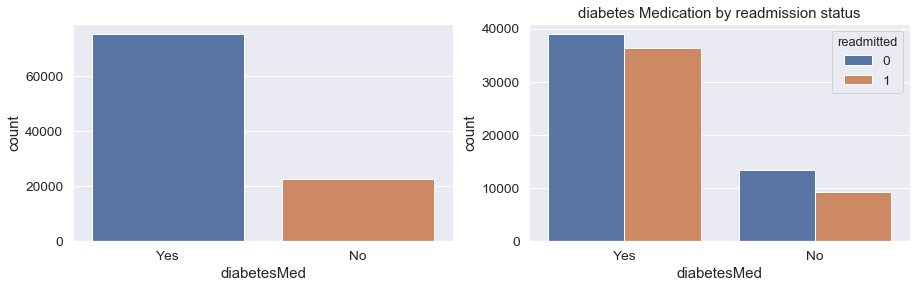

In [0]:
# Count plot of diabetes medication by readmission status

f, axes = plt.subplots(1, 2, figsize=(15,4))
axes = axes.flatten()
sns.countplot(data['diabetesMed'], ax=axes[0])
axes[0].set_xlabel('diabetesMed')

sns.countplot(data['diabetesMed'],hue = data['readmitted'], ax=axes[1]).set_title('diabetes Medication by readmission status')
axes[1].set_xlabel('diabetesMed')

plt.show()

In [0]:
pd.crosstab(data['diabetesMed'],data['readmitted'])

readmitted,0,1
diabetesMed,,
No,13402,9300
Yes,38935,36415


**Inferences**:

* Most of the patients were prescribed with diabetes related medication.
* Patients who are prescribed with diabetes related medication are having a higher rate of readmission (48.33%).

In [0]:
# Mapping discharge disposition ids with their respective descriptions

data['discharge_disposition'] = data['discharge_disposition_id'].replace(
    {1:'discharged to home',2:'transferred to facility',3:'transferred to facility',4:'transferred to facility',
     5:'transferred to facility',6:'discharged to home',7:'discharged to home',8:'discharged to home',
     9:'transferred to facility',10:'transferred to hospital',11:'death',12:'transferred to facility',
     13:'discharged to home',14:'transferred to hospital',15:'transferred to facility',16:'transferred to hospital',
     17:'transferred to facility',18:'Otherwise',19:'death',20:'death',21:'death',22:'transferred to facility',
     23:'transferred to hospital',24:'transferred to facility',25:'Otherwise',26:'Otherwise',27:'transferred to facility',
     28:'transferred to facility',29:'transferred to hospital',30:'transferred to facility'})

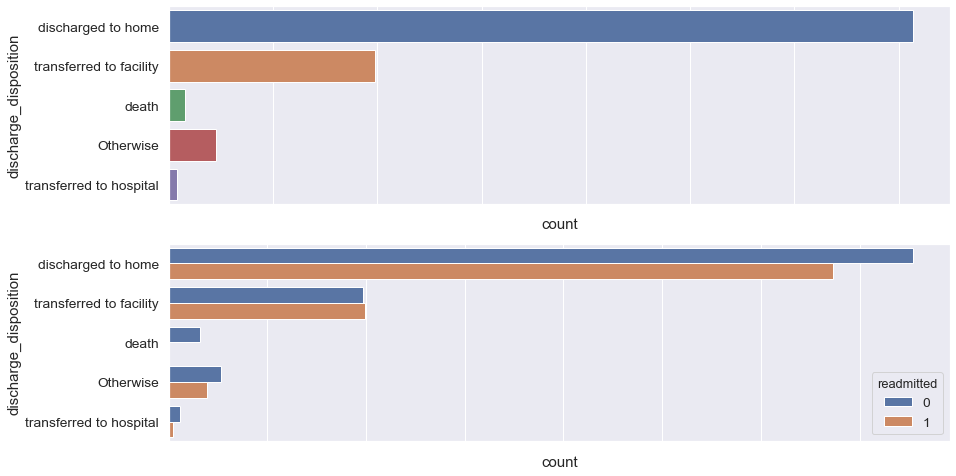

In [0]:
# Count plot of discharge disposition by readmission status

fig,ax = plt.subplots(2,1,figsize=(14,8)) 
ax = ax.flatten() 
a=sns.countplot(y=data['discharge_disposition'],ax = ax[0]) 
a.set_xticklabels(a.get_xticklabels(), rotation=90)
b=sns.countplot(y=data['discharge_disposition'],hue = data['readmitted'],ax = ax[1])
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()

In [0]:
pd.crosstab(data['discharge_disposition'],data['readmitted'])

readmitted,0,1
discharge_disposition,,
Otherwise,2641,1924
death,1616,0
discharged to home,37685,33644
transferred to facility,9822,9935
transferred to hospital,573,212


**Inferences:**

* Most of the patients are discharged to their homes.
* 50.29% of patients who were transferred to another facility got readmitted, having the highest rate.
* Patients who were transferred to other hospitals has the least rate of readmission (27.01%).

In [0]:
# Mapping admission source ids with their respective descriptions

data['admission_source'] = data['admission_source_id'].replace({1:'Through Reference',2:'Through Reference',
                                                       3:'Through Reference',4:'Transfer from a Facility/Hospital',
                                                       5:'Transfer from a Facility/Hospital',
                                                       6:'Transfer from a Facility/Hospital',
                                                       7:'Admitted from emergency room',8:'Otherwise',
                                                       9:'Not Available',10:'Transfer from a Facility/Hospital',
                                                       11:'Otherwise',13:'Otherwise',14:'Otherwise',15:'Not Available',
                                                       17:'Not Available',20:'Not Available',21:'Not Available',22:'Transfer from a Facility/Hospital',
                                                       23:'Otherwise',24:'Otherwise',25:'Transfer from a Facility/Hospital',
                                                       26:'Transfer from a Facility/Hospital'})

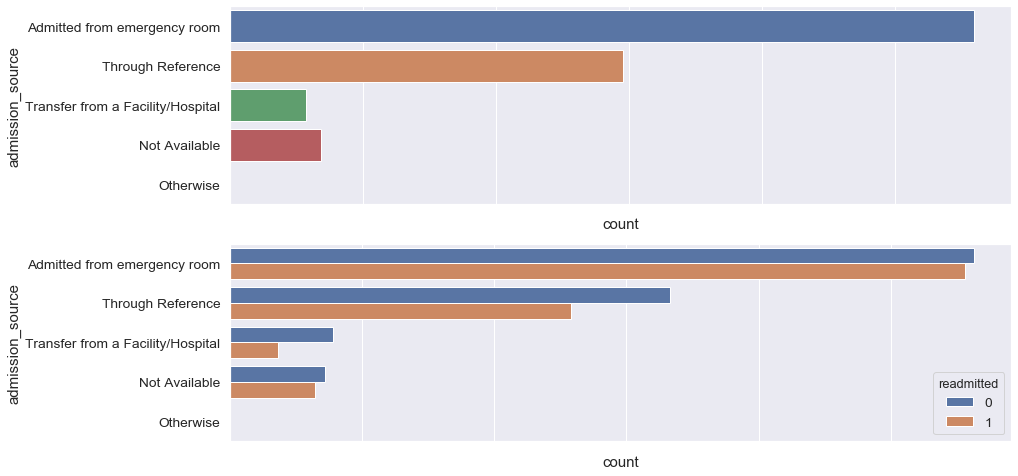

In [0]:
# Count plot of admission sources by readmission status

fig,ax = plt.subplots(2,1,figsize=(14,8)) 
ax = ax.flatten() 
a=sns.countplot(y=data['admission_source'],ax = ax[0]) 
a.set_xticklabels(a.get_xticklabels(), rotation=90)
b=sns.countplot(y=data['admission_source'],hue = data['readmitted'],ax = ax[1])
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()

In [0]:
pd.crosstab(data['admission_source'],data['readmitted'])

readmitted,0,1
admission_source,,
Admitted from emergency room,28153,27798
Not Available,3600,3211
Otherwise,14,6
Through Reference,16664,12901
Transfer from a Facility/Hospital,3906,1799


**Inferences:**

* Patients having an admission source of emergency rooms are most in number followed by references.
* Patients admitted from emergency rooms are having the highest rate of readmission (49.69%).
* Patients transferred from other undefined sources are having the lowest rate of readmission (30%).

In [0]:
# Mapping admission type ids with their respective descriptions

data['admission_type'] = data['admission_type_id'].replace({1:'Emergency',2:'Emergency',
                                                    3:'Elective', 4:'Newborn',
                                                    5:'Not Available',6:'Not Available',
                                                    7:'Trauma Center',8:'Not Available'})

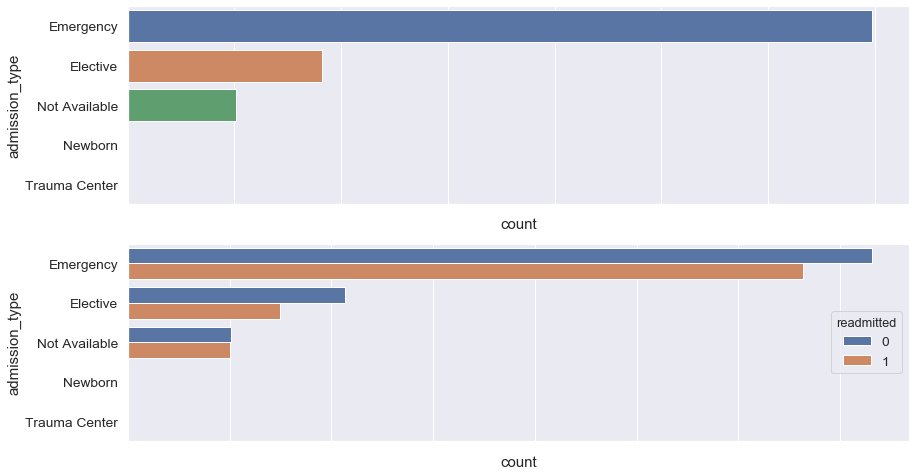

In [0]:
# Count plot of admission type by readmission status

fig,ax = plt.subplots(2,1,figsize=(14,8)) 
ax = ax.flatten() 
a=sns.countplot(y=data['admission_type'],ax = ax[0]) 
a.set_xticklabels(a.get_xticklabels(), rotation=90)
b=sns.countplot(y=data['admission_type'],hue = data['readmitted'],ax = ax[1])
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()

In [0]:
pd.crosstab(data['admission_type'],data['readmitted'])

readmitted,0,1
admission_type,,
Elective,10689,7504
Emergency,36545,33176
Newborn,7,3
Not Available,5076,5032
Trauma Center,20,0


**Inferences:**

* Admissions of emergency are most in number followed by elective types.
* Admissions of undefined types are having the highest rate of readmissions (49.79%).
* Trauma Center type admissions are having the lowest rate (0%).

## Feature Engineering

Feature Engineering: The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as we did with the log and square root, or one-hot encoding categorical variables so they can be used in a model. Generally, I think of feature engineering as adding additional features derived from the raw data.

In this project, we will take the following steps for feature engineering:     
     
1. Convert object type variables to numerical.     
2. Label encode the categorical variables for achieving point 1.
3. Group similar data.          

#### age

We will convert age into 3 groups:     

* 0 - 30 as 1
* 30 - 60 as 2
* Greater than 60 as 3

In [0]:
#Function to categorize

def age_category(age):
    if age in ['[0-10)','[10-20)','[20-30)']:
        return 1
    elif age in ['[30-40)','[40-50)','[50-60)']:
        return 2
    else:
        return 3

#Applying function for creating a new categorized age_cat column
data['age_cat'] = data['age'].apply(age_category)

#Dropping the age column
data.drop('age',axis=1,inplace=True)

#### Race

We will merge "Hispanic" and "Asian" races to "Other" race

In [0]:
# Transformation of  race to three different races

data['race'] = data['race'].replace({'Hispanic':"Other",'Asian':"Other"})
data["race"].value_counts()

Caucasian          75079
AfricanAmerican    18881
Other               4092
Name: race, dtype: int64

In [0]:
# dropping columns related to IDs

data.drop(['encounter_id','patient_nbr',"discharge_disposition_id","admission_source_id","admission_type_id"],
          axis=1,inplace=True)

### Converting Categorical data to Numerical Data using Label encoder

In [0]:
labelencoder = LabelEncoder()

cols = ['race', 'diag_1', 'diag_2', 'diag_3',"gender","max_glu_serum",'A1Cresult','change',
        "discharge_disposition","admission_source","admission_type","readmitted","diabetesMed"]

for col in cols:
    data[col] = labelencoder.fit_transform(data[col])

In [0]:
data.shape

(98052, 45)

### Building model without feature engineering and feature selection..

In [0]:
from sklearn.model_selection import train_test_split
X=data.drop(["readmitted"],axis=1)
y=data["readmitted"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)
model=LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
print('Training score =', model.score(x_train, y_train))
print('Test score =', model.score(x_test, y_test))

Training score = 0.6210589195174544
Test score = 0.6186769105248844


# Assumptions for logistic regression

1. **Dependent binary variable**

In [0]:
data['readmitted'].value_counts()

0    52337
1    45715
Name: readmitted, dtype: int64

The dataset has only two values in its dependent variable

2. **No repeated observations**

In [0]:
data.duplicated().value_counts()

False    98049
True         3
dtype: int64

No repeated observations or very less.

3. **No multi-collinearity**

In [0]:
# Taking the dependent and independent variables separately

X = data.drop('readmitted', axis=1)
y= data['readmitted']

# Checking the VIF values

Xc=sm.add_constant(X)

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
vif['features']=Xc.columns
vif.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
vif,72.3138,1.0349,1.02041,1.42647,1.31611,1.32454,1.65664,1.07595,1.10591,1.1171,1.09295,1.05646,1.03716,1.219,1.29433,1.11036,1.27938,1.02847,1.01197,1.00425,1.09377,1.00024,1.21982,1.23094,1.00105,1.1004,1.08592,1.00525,1.00129,1.00043,1.00178,NaN,NaN,2.00577,1.01565,1.00157,1.00023,NaN,1.0003,1.96685,1.98673,1.06324,1.20908,1.3344,1.12583
features,const,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,discharge_disposition,admission_source,admission_type,age_cat


All the variables present have a VIF value close to 1, so multi co-linearity is not present.

4. **Large sample size**

In [0]:
data.shape

(98052, 45)

The sample size is large.

# Feature Selection

Now that we have explored the trends and relationships within the data, we can work on selecting a set of features for our models. In particular, we learned the following from EDA which can help us in engineering/selecting features:     

1.	The target variable is fairly balanced.
2.	Percentage of females getting readmitted is more than that of males.
3.	47.13% of the Caucasians gets readmitted (highest) whereas 35.84% of the Asians gets readmitted (lowest).
4.	Approximately 50-51% of the patients gets readmitted under the time of 8 to 10 days (highest) whereas 40.31% in case of patients coming for a single day (lowest).
5.	Diabetes has the maximum number of readmissions under primary diagnosis (52.74%) whereas Musculoskeletal has the lowest with 39.82%.
6.	Genitourinary and Respiratory has the maximum number of readmissions under secondary diagnosis (approx. 48%) whereas Injury has the lowest with 39.99%.
7.	Genitourinary has the maximum number of readmissions under tertiary diagnosis (51.16%) whereas Injury has the lowest with 41.59%.
8.	Around 48.5% of patients under the age groups of 70-80 and 80-90 gets readmitted which is the most in number while the age group of 0-10 has the least with 21.54%.
9.	Approximately 56.07% of patients whose results are very high were readmitted (highest) whereas 45.66% of patients under the category of people whose results are normal were readmitted (lowest).
10.	Approximately 47% of patients are getting readmitted who either did not take the test or had a very high test result (highest) while people whose results were normal are lowest in number (42.03%).
11.	Patients who had a change of medication had a higher rate of readmission (49.05%).
12.	Patients who are prescribed with diabetes related medication are having a higher rate of readmission (48.33%).
13.	50.29% of patients who were transferred to another facility got readmitted, having the highest rate while patients who were transferred to other hospitals have the least rate of readmission (27.01%).
14.	Patients admitted from emergency rooms are having the highest rate of readmission (49.69%) while patients transferred from other undefined sources are having the lowest rate of readmission (30%).
15.	Admissions of undefined types are having the highest rate of readmissions (49.79%) while Trauma Center type admissions are having the lowest rate (0%).

Feature Selection: The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as subtracting features so we are left with only those that are most important.
Feature selection is an iterative process that will usually require several attempts to get right. Often we will use the results of modeling, such as the feature importances from a random forest, to go back and redo feature selection, or we might later discover relationships that necessitate creating new variables. Moreover, these processes usually incorporate a mixture of domain knowledge and statistical qualitites of the data.

Feature selection often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn.

For feature selection, we will do the following:     
     
1. Perform a Chi-square test of independence and ANOVA to select only significant features based on their p-values.

In [0]:
# Performing ANOVA test
num = ['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','number_diagnoses']
columns = []
p = []
for col in num: 

    import scipy.stats as stats
    statistic,p_value = stats.f_oneway(data[data['readmitted']==0][col], data[data['readmitted']==1][col])
    columns.append(col)
    p.append(p_value)
    
d1 = pd.DataFrame({'Feature':columns,'p_value':p})
d1

,Feature,p_value
0,time_in_hospital,5.108345e-57
1,num_lab_procedures,1.793283e-34
2,num_procedures,5.402979e-48
3,num_medications,1.495651e-67
4,number_outpatient,1.159752e-230
5,number_emergency,4.293430e-321
6,number_inpatient,0.000000e+00
7,number_diagnoses,2.749126e-238


In [0]:
# Applying Chi2 test to find out the p_values

columns = []
p_value = []
for col in ['race', 'gender','diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed',
       'age_cat', 'discharge_disposition', 'admission_source',
       'admission_type', 'A1Cresult','change','readmitted']:
    a = stats.chi2_contingency(pd.crosstab(data['readmitted'], data[col]))
    columns.append(col)
    p_value.append(a[1])
    
d2 = pd.DataFrame({'Feature':columns,'p_value':p_value})
d2

,Feature,p_value
0,race,1.056647e-17
1,gender,3.588814e-08
2,diag_1,1.827633e-60
3,diag_2,4.063193e-32
4,diag_3,5.913864e-27
5,max_glu_serum,2.506782e-10
6,metformin,2.666290e-17
7,repaglinide,1.845921e-10
8,nateglinide,5.837905e-01
9,chlorpropamide,2.180909e-01


In [0]:
c  = pd.concat([d1,d2])

In [0]:
# Selecting significant features from the list (having p-value<0.05)
new_features = list(c[c['p_value']<0.05]['Feature'])
new_df = data.loc[:,new_features]
print(len(new_features))
new_features

29


['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'race',
 'gender',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'metformin',
 'repaglinide',
 'glipizide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'insulin',
 'diabetesMed',
 'age_cat',
 'discharge_disposition',
 'admission_source',
 'admission_type',
 'A1Cresult',
 'change',
 'readmitted']

Our final dataset now has 29 features (one of the columns is the target)

## Scaling Features

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. Linear Regression and Random Forest do not require feature scaling, but other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations. For this reason, it is a best practice to scale features when we are comparing multiple algorithms.

There are two ways to scale features:

1. For each value, subtract the mean of the feature and divide by the standard deviation of the feature. This is known as standardization and results in each feature having a mean of 0 and a standard deviation of 1.
2. For each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1 and is called scaling to a range or normalization.

When we train the scaling object, we want to use only the training set. When we transform features, we will transform both the training set and the testing set.

In [0]:
# Taking the dependent and independent variables separately and splitting them into train and test dataset

X = new_df.drop('readmitted',axis=1)
y= new_df['readmitted']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

### Models to Evaluate

We will compare different machine learning models using the great Scikit-Learn library:

1. Logistic Regression
2. Naive-Bayes
3. Decision Tree Classifier
4. Random Forest Classifier
5. Ada Boost Classifier
6. Gradient Boost Classifier
7. Ensemble models

To compare the models, we are going to be mostly using the Scikit-Learn defaults for the model hyperparameters. Generally these will perform decently, but should be optimized before actually using a model. At first, we just want to determine the baseline performance of each model, and then we can select the best performing model for further optimization using hyperparameter tuning.

### Gini Coefficient
Gini coefficient is sometimes used in classification problems. Gini coefficient can be straigh away derived from the AUC ROC number. Gini is nothing but ratio between area between the ROC curve and the diagnol line & the area of the above triangle. Following is the formulae used :

Gini = 2*AUC – 1

Gini above 60% is a good model.

In [0]:
# Function to fit and evaluate a model

train = []
test = []
def model_fit(algo,X_train,y_train,X_test,y_test):
  algo.fit(X_train,y_train)
  y_train_pred=algo.predict(X_train)
  y_train_prob=algo.predict_proba(X_train)[:,1]
  print("auc score of train data",roc_auc_score(y_train,y_train_prob))
  train.append(roc_auc_score(y_train,y_train_prob))

  y_test_pred=algo.predict(X_test) #ML
  y_test_prob=algo.predict_proba(X_test)[:,1] #  in statistics
  print("auc score of test data",roc_auc_score(y_test,y_test_prob))
  test.append(roc_auc_score(y_test,y_test_prob))
  print("confusion_matrix",confusion_matrix(y_test,y_test_pred))
  print("classification_report")
  print(classification_report(y_test,y_test_pred))
  fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
  
  roc_auc = auc(fpr, tpr)
  print("roc_auc",roc_auc)
  GINI = (2 * roc_auc) - 1
  print("GINI",GINI)
  plt.plot(fpr,tpr)
  plt.plot(fpr,fpr)
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.title("ROC_AUC CURVE")

### Logistic Regression

auc score of train data 0.6595147692882178
auc score of test data 0.6605743553434045
confusion_matrix [[12155  3415]
 [ 7784  6062]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.78      0.68     15570
           1       0.64      0.44      0.52     13846

    accuracy                           0.62     29416
   macro avg       0.62      0.61      0.60     29416
weighted avg       0.62      0.62      0.61     29416

roc_auc 0.6605743553434045
GINI 0.32114871068680895


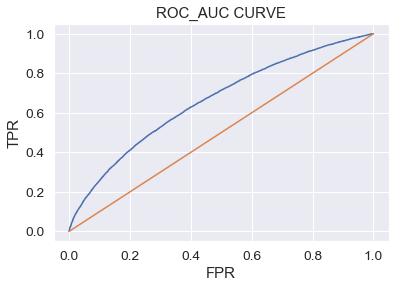

In [0]:
lr = LogisticRegression()
model_fit(lr,X_train_s,y_train,X_test_s,y_test)

### Naive-Bayes

auc score of train data 0.6427701702966654
auc score of test data 0.6434326379049256
confusion_matrix [[12357  3213]
 [ 8449  5397]]
classification_report
              precision    recall  f1-score   support

           0       0.59      0.79      0.68     15570
           1       0.63      0.39      0.48     13846

    accuracy                           0.60     29416
   macro avg       0.61      0.59      0.58     29416
weighted avg       0.61      0.60      0.59     29416

roc_auc 0.6434326379049256
GINI 0.2868652758098511


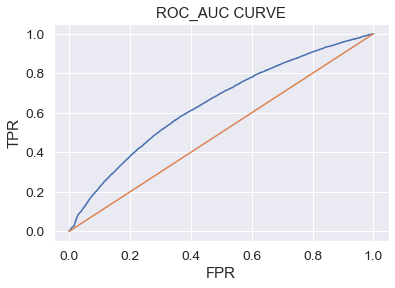

In [0]:
nb = GaussianNB()
model_fit(nb,X_train,y_train,X_test,y_test)

### Decision Tree Classifier

auc score of train data 0.9999999982931186
auc score of test data 0.5538358079808251
confusion_matrix [[9051 6519]
 [6558 7288]]
classification_report
              precision    recall  f1-score   support

           0       0.58      0.58      0.58     15570
           1       0.53      0.53      0.53     13846

    accuracy                           0.56     29416
   macro avg       0.55      0.55      0.55     29416
weighted avg       0.56      0.56      0.56     29416

roc_auc 0.5538358079808251
GINI 0.1076716159616502


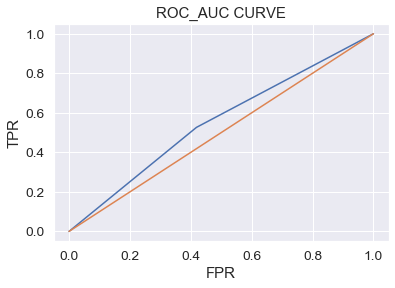

In [0]:
dt = DecisionTreeClassifier()
model_fit(dt,X_train,y_train,X_test,y_test)

### Random Forest Classifier

auc score of train data 0.9989150071368598
auc score of test data 0.6273237213161642
confusion_matrix [[11441  4129]
 [ 7658  6188]]
classification_report
              precision    recall  f1-score   support

           0       0.60      0.73      0.66     15570
           1       0.60      0.45      0.51     13846

    accuracy                           0.60     29416
   macro avg       0.60      0.59      0.59     29416
weighted avg       0.60      0.60      0.59     29416

roc_auc 0.6273237213161642
GINI 0.2546474426323284


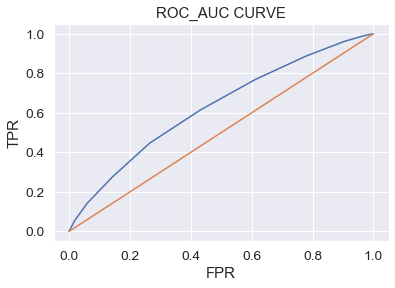

In [0]:
rf = RandomForestClassifier()
model_fit(rf,X_train,y_train,X_test,y_test)

## Ensemble Methods

### Bagging

Bagging stands for bootstrap aggregation. One way to reduce the variance of an estimate is to average together multiple estimates. For example, we can train 𝑀 different trees 𝑓𝑚 on different subsets of the data (chosen randomly with replacement) and compute the ensemble: 𝑓(𝑥)=1𝑀∑𝑚=1𝑀𝑓𝑚(𝑥)

Bagging uses bootstrap sampling to obtain the data subsets for training the base learners. For aggregating the outputs of base learners, bagging uses voting for classification and averaging for regression.

#### BaggingClassifier with DecisionTree

auc score of train data 0.9987633788815592
auc score of test data 0.6252537314997498
confusion_matrix [[11208  4362]
 [ 7674  6172]]
classification_report
              precision    recall  f1-score   support

           0       0.59      0.72      0.65     15570
           1       0.59      0.45      0.51     13846

    accuracy                           0.59     29416
   macro avg       0.59      0.58      0.58     29416
weighted avg       0.59      0.59      0.58     29416

roc_auc 0.6252537314997498
GINI 0.25050746299949966


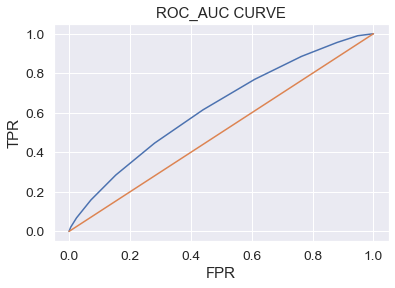

In [0]:
dt_bg=BaggingClassifier()
dt_bg.fit(X_train,y_train)
model_fit(dt_bg,X_train,y_train,X_test,y_test)

#### BaggingClassifier with Logistic Regression

auc score of train data 0.6595928830119322
auc score of test data 0.6607774797012481
confusion_matrix [[12185  3385]
 [ 7826  6020]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.78      0.68     15570
           1       0.64      0.43      0.52     13846

    accuracy                           0.62     29416
   macro avg       0.62      0.61      0.60     29416
weighted avg       0.62      0.62      0.61     29416

roc_auc 0.6607774797012481
GINI 0.32155495940249623


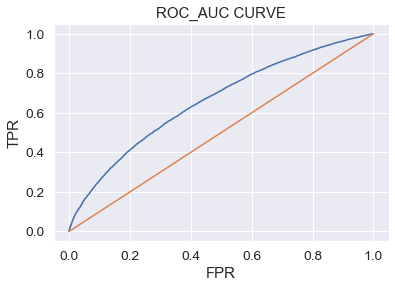

In [0]:
lr = LogisticRegression()
lr_bg=BaggingClassifier(base_estimator=lr)
lr_bg.fit(X_train,y_train)
model_fit(lr_bg,X_train_s,y_train,X_test_s,y_test)

#### BaggingClassifier with Naive Bayes

auc score of train data 0.6431892664520094
auc score of test data 0.6438765868539622
confusion_matrix [[12324  3246]
 [ 8419  5427]]
classification_report
              precision    recall  f1-score   support

           0       0.59      0.79      0.68     15570
           1       0.63      0.39      0.48     13846

    accuracy                           0.60     29416
   macro avg       0.61      0.59      0.58     29416
weighted avg       0.61      0.60      0.59     29416

roc_auc 0.6438765868539622
GINI 0.2877531737079244


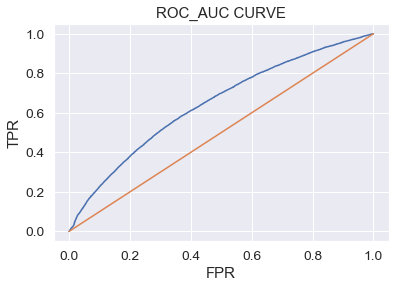

In [0]:
nb = GaussianNB()
nb_bg=BaggingClassifier(base_estimator=nb)
nb_bg.fit(X_train,y_train)
model_fit(nb_bg,X_train,y_train,X_test,y_test)

### Boosting

Boosting refers to a family of algorithms that are able to convert weak learners to strong learners. The main principle of boosting is to fit a sequence of weak learners (models that are only slightly better than random guessing, such as small decision trees) to weighted versions of the data, where more weight is given to examples that were mis-classified by earlier rounds. The predictions are then combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction. The principal difference between boosting and the committee methods such as bagging is that base learners are trained in sequence on a weighted version of the data.

#### AdaBoost Classifier (Decision Tree)

auc score of train data 0.6783198635336656
auc score of test data 0.6785071027657105
confusion_matrix [[11957  3613]
 [ 7234  6612]]
classification_report
              precision    recall  f1-score   support

           0       0.62      0.77      0.69     15570
           1       0.65      0.48      0.55     13846

    accuracy                           0.63     29416
   macro avg       0.63      0.62      0.62     29416
weighted avg       0.63      0.63      0.62     29416

roc_auc 0.6785071027657105
GINI 0.35701420553142094


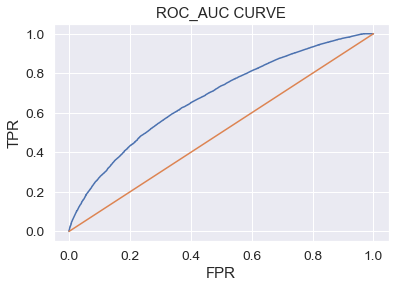

In [0]:
dt_bt=AdaBoostClassifier()
model_fit(dt_bt,X_train,y_train,X_test,y_test)

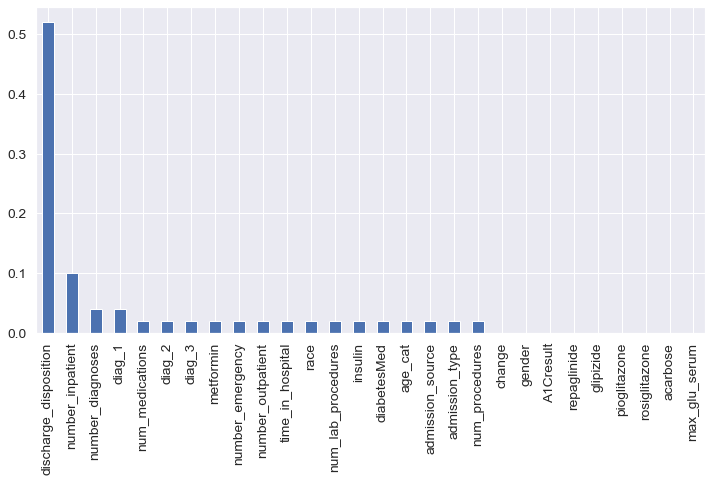

In [0]:
importance = pd.Series(dt_bt.feature_importances_)
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))
plt.show()

#### AdaBoost Classifier (Logistic Regression)

auc score of train data 0.6538697700284369
auc score of test data 0.6547334840507719
confusion_matrix [[12172  3398]
 [ 7909  5937]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.78      0.68     15570
           1       0.64      0.43      0.51     13846

    accuracy                           0.62     29416
   macro avg       0.62      0.61      0.60     29416
weighted avg       0.62      0.62      0.60     29416

roc_auc 0.6547334840507719
GINI 0.30946696810154384


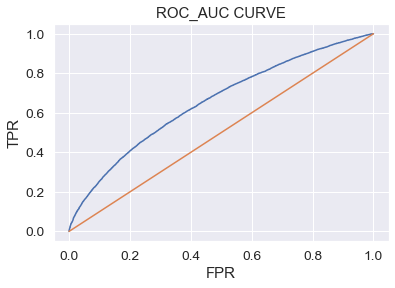

In [0]:
lr=LogisticRegression()
lr_bt=AdaBoostClassifier(base_estimator=lr)
model_fit(lr_bt,X_train_s,y_train,X_test_s,y_test)

#### AdaBoost Classifier (Naive-Bayes)

auc score of train data 0.5239561279811296
auc score of test data 0.5241069671701126
confusion_matrix [[11185  4385]
 [ 9423  4423]]
classification_report
              precision    recall  f1-score   support

           0       0.54      0.72      0.62     15570
           1       0.50      0.32      0.39     13846

    accuracy                           0.53     29416
   macro avg       0.52      0.52      0.50     29416
weighted avg       0.52      0.53      0.51     29416

roc_auc 0.5241069671701126
GINI 0.04821393434022525


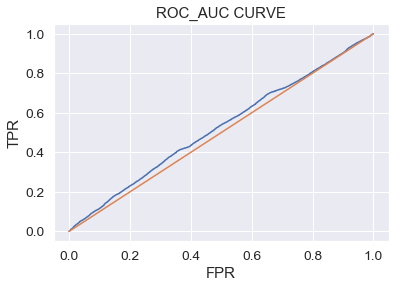

In [0]:
nb = GaussianNB()
nb_bt=AdaBoostClassifier(base_estimator=nb)
model_fit(nb_bt,X_train,y_train,X_test,y_test)

#### AdaBoost Classifier (Random Forest)

auc score of train data 0.9999999982931186
auc score of test data 0.6456714009160867
confusion_matrix [[10933  4637]
 [ 6849  6997]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.70      0.66     15570
           1       0.60      0.51      0.55     13846

    accuracy                           0.61     29416
   macro avg       0.61      0.60      0.60     29416
weighted avg       0.61      0.61      0.61     29416

roc_auc 0.6456714009160867
GINI 0.2913428018321733


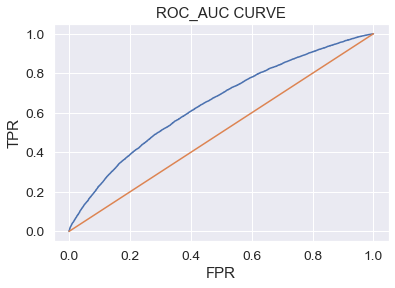

In [0]:
rf = RandomForestClassifier()
rf_bt=AdaBoostClassifier(base_estimator=rf)
model_fit(rf_bt,X_train,y_train,X_test,y_test)

#### Gradient Boost Classifier

auc score of train data 0.6923203313711016
auc score of test data 0.6862338809758988
confusion_matrix [[11746  3824]
 [ 6975  6871]]
classification_report
              precision    recall  f1-score   support

           0       0.63      0.75      0.69     15570
           1       0.64      0.50      0.56     13846

    accuracy                           0.63     29416
   macro avg       0.63      0.63      0.62     29416
weighted avg       0.63      0.63      0.63     29416

roc_auc 0.6862338809758988
GINI 0.37246776195179754


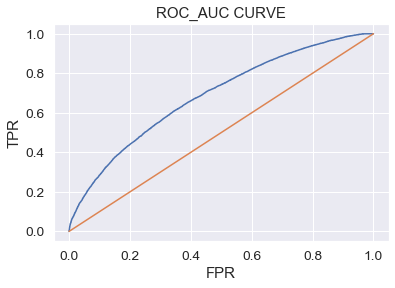

In [0]:
gb=GradientBoostingClassifier()
model_fit(gb,X_train,y_train,X_test,y_test)

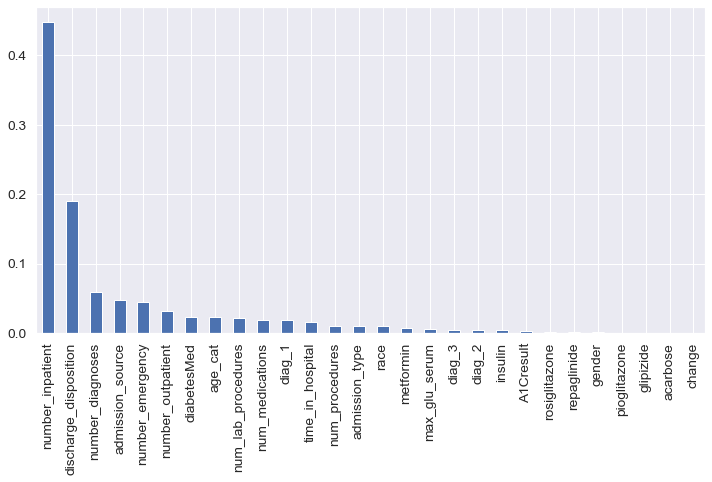

In [0]:
importance = pd.Series(gb.feature_importances_)
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))
plt.show()

# Model Optimization

In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem.

## Hyperparameters

Hyperparameters
First off, we need to understand what model hyperparameters are in contrast to model parameters :

* Model hyperparameters are best thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or the number of neighbors used in K Nearest Neighbors Regression.
* Model parameters are what the model learns during training, such as the weights in the linear regression.

We as data scientists control a model by choosing the hyperparameters, and these choices can have a significant effect on the final performance of the model (although usually not as great of an effect as getting more data or engineering features).

Tuning the model hyperparameters controls the balance of under vs over fitting in a model. We can try to correct for under-fitting by making a more complex model, such as using more trees in a random forest or more layers in a deep neural network. A model that underfits has high bias, and occurs when our model does not have enough capacity (degrees of freedom) to learn the relationship between the features and the target. We can try to correct for overfitting by limiting the complexity of the model and applying regularization. This might mean decreasing the degree of a polynomial regression, or adding dropout layers to a deep neural network. A model that overfits has high variance and in effect has memorized the training set. Both underfitting and overfitting lead to poor generalization performance on the test set.

The problem with choosing the hyperparameters is that no set will work best across all problems. Therefore, for every new dataset, we have to find the best settings. This can be a time-consuming process, but luckily there are several options for performing this procedure in Scikit-Learn.

## Hyperparameter Tuning with Random Search and Cross Validation

We can choose the best hyperparameters for a model through random search and cross validation.

* Random search refers to the method in which we choose hyperparameters to evaluate: we define a range of options, and then randomly select combinations to try. This is in contrast to grid search which evaluates every single combination we specify. Generally, random search is better when we have limited knowledge of the best model hyperparameters and we can use random search to narrow down the options and then use grid search with a more limited range of options.

* Cross validation is the method used to assess the performance of the hyperparameters. Rather than splitting the training set up into separate training and validation sets which reduces the amount of training data we can use, we use K-Fold Cross Validation. This means dividing the training data into K folds, and then going through an iterative process where we first train on K-1 of the folds and then evaluate performance on the kth fold. We repeat this process K times so eventually we will have tested on every example in the training data with the key that each iteration we are testing on data that we **did not train on**. At the end of K-fold cross validation, we take the average error on each of the K iterations as the final performance measure and then train the model on all the training data at once. The performance we record is then used to compare different combinations of hyperparameters.

We let Scikit-Learn and RandomizedSearchCV do the process for us!

##### Hyper parameter tuning for Decision Tree Classifier

In [0]:
dt = DecisionTreeClassifier()
parameters = {'max_depth': range(1, 24),
    'min_samples_leaf': range(10, 150),
    'min_samples_split': range(10, 150),
    'criterion': ["entropy", "gini"]}
RS_dt = RandomizedSearchCV(dt, parameters, 
                    cv=3, scoring="accuracy",random_state=0)
RS_dt.fit(X_train,y_train)
RS_dt.best_params_

{'min_samples_split': 145,
 'min_samples_leaf': 117,
 'max_depth': 8,
 'criterion': 'entropy'}

auc score of train data 0.6785556034941751
auc score of test data 0.6682286136583991
confusion_matrix [[11710  3860]
 [ 7187  6659]]
classification_report
              precision    recall  f1-score   support

           0       0.62      0.75      0.68     15570
           1       0.63      0.48      0.55     13846

    accuracy                           0.62     29416
   macro avg       0.63      0.62      0.61     29416
weighted avg       0.63      0.62      0.62     29416

roc_auc 0.6682286136583991
GINI 0.3364572273167983


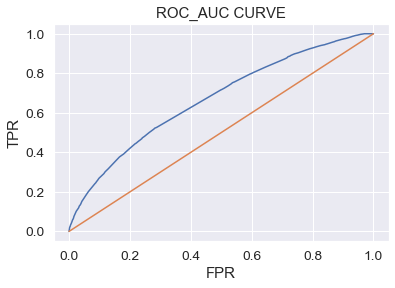

In [0]:
dt = DecisionTreeClassifier(**RS_dt.best_params_)
model_fit(dt,X_train,y_train,X_test,y_test)

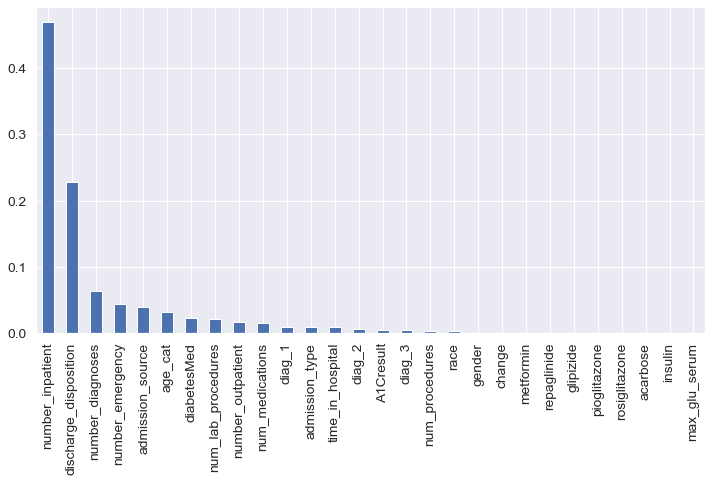

In [0]:
importance = pd.Series(dt.feature_importances_)
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))
plt.show()

##### Hyper parameter tuning for Random Forest Classifier

In [0]:
rf = RandomForestClassifier()
parameters={'max_depth':[2,4,6,8,10],'min_samples_leaf':range(1,50),
            'min_samples_split':range(10,100),'n_estimators':[1,2,3,4,5,6]}
RS_rf= RandomizedSearchCV(rf, param_distributions=parameters, cv=3,random_state=0)
RS_rf.fit(X_train,y_train)
RS_rf.best_params_

{'n_estimators': 6,
 'min_samples_split': 99,
 'min_samples_leaf': 31,
 'max_depth': 10}

auc score of train data 0.6931159203469526
auc score of test data 0.6727634658368394
confusion_matrix [[11793  3777]
 [ 7262  6584]]
classification_report
              precision    recall  f1-score   support

           0       0.62      0.76      0.68     15570
           1       0.64      0.48      0.54     13846

    accuracy                           0.62     29416
   macro avg       0.63      0.62      0.61     29416
weighted avg       0.63      0.62      0.62     29416

roc_auc 0.6727634658368394
GINI 0.34552693167367887


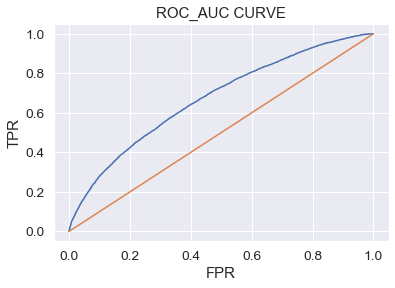

In [0]:
rf = RandomForestClassifier(**RS_rf.best_params_,random_state=0)
model_fit(rf,X_train,y_train,X_test,y_test)

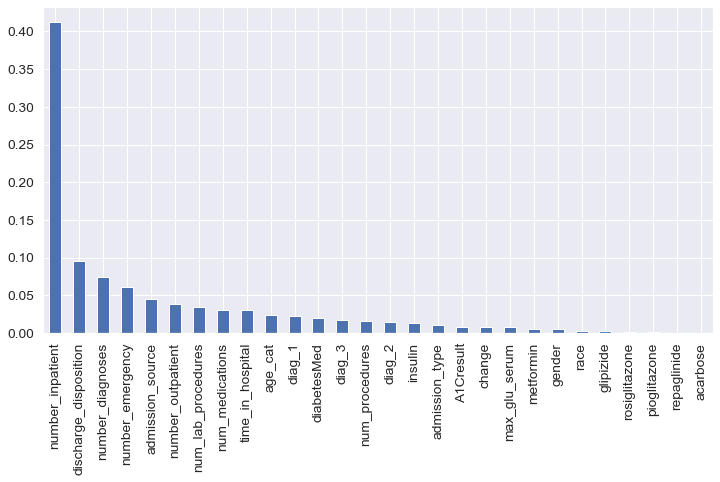

In [0]:
importance = pd.Series(rf.feature_importances_)
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))
plt.show()

In [0]:
score = pd.DataFrame({'model':['Logistic Regression', 'Naive-Bayes', 'Decision Tree Classifier', 'Random Forest Classifier',
                               'DecisionTree (bagged)', 'Logistic Regression (bagged)', 'Naive-Bayes (bagged)',
                               'Decision Tree (boosted)', 'Logistic Regression (boosted)', 'Naive-Bayes (boosted)',
                               'Random Forest (boosted)', 'Gradient Boost Classifier', 'Decision Tree (tunned)',
                               'Random Forest (tunned)'],
                     'train_accuracy':train,'test_accracy':test})
score

,model,train_accuracy,test_accracy
0,Logistic Regression,0.659515,0.660574
1,Naive-Bayes,0.642770,0.643433
2,Decision Tree Classifier,1.000000,0.554844
3,Random Forest Classifier,0.998983,0.629632
4,DecisionTree (bagged),0.998776,0.627371
5,Logistic Regression (bagged),0.659350,0.660229
6,Naive-Bayes (bagged),0.642500,0.643165
7,Decision Tree (boosted),0.678320,0.678507
8,Logistic Regression (boosted),0.653870,0.654733
9,Naive-Bayes (boosted),0.483958,0.482849


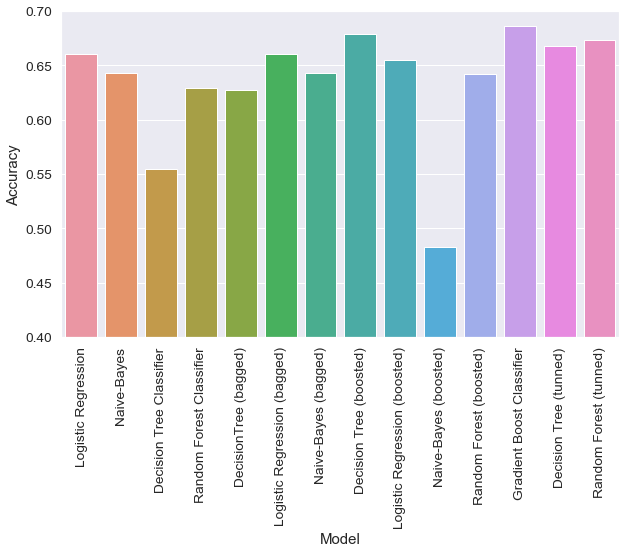

In [0]:
plt.figure(figsize=(10,6))
sns.barplot(x="model", y="test_accracy", data=score)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.4,0.7])
plt.xticks(rotation=90)
plt.show()